In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [104]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [106]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [107]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Dropping Irrelevant Features

In [108]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [109]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [110]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding Categorical Data

In [111]:
df = pd.get_dummies(df,drop_first = True)

In [112]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


## Some insights about the target variable 

In [113]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='count'>

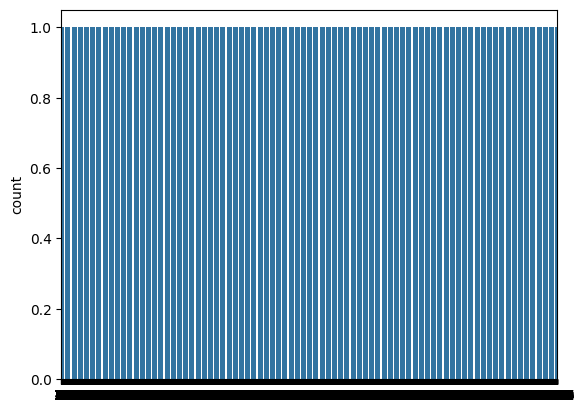

In [114]:
sns.countplot(df['Exited'])

In [115]:
X = df.drop('Exited',axis=1)
y = df['Exited']

## Handling Imbalanced Data with SMOTE

In [116]:
from imblearn.over_sampling import SMOTE

In [117]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [118]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='count'>

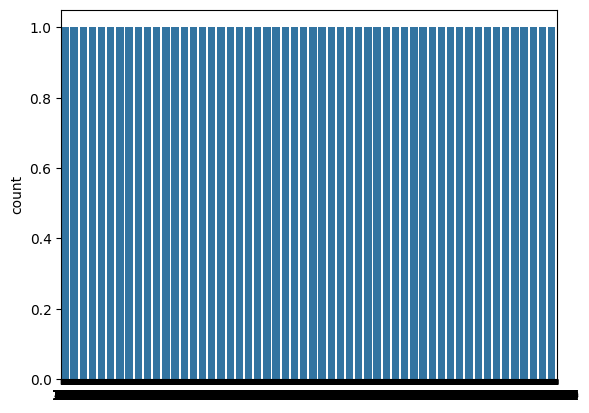

In [119]:
sns.countplot(y_res)

## Splitting The Dataset into Training Set and Test Set

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

## Feature Scaling

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
sc = StandardScaler()

In [124]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
X_train

array([[ 0.76552522, -0.89557497,  0.80061652, ..., -0.76123864,
         1.58084104, -1.21817783],
       [-0.67847888, -0.79593356,  1.16702208, ..., -0.76123864,
        -0.63257467,  0.82089821],
       [-1.32390495,  0.20048051,  0.80061652, ..., -0.76123864,
         1.58084104,  0.82089821],
       ...,
       [-0.26278073,  1.3961774 , -1.39781683, ...,  1.3136485 ,
        -0.63257467,  0.82089821],
       [ 0.48110017, -0.99521638, -1.39781683, ..., -0.76123864,
        -0.63257467,  0.82089821],
       [ 1.64067922,  2.19330866, -1.39781683, ..., -0.76123864,
        -0.63257467, -1.21817783]])

## Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
log = LogisticRegression()

In [128]:
log.fit(X_train, y_train)

LogisticRegression()

In [129]:
y_pred1 = log.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy_score(y_test,y_pred1)

0.7639179573043114

In [132]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [133]:
precision_score(y_test, y_pred1)

0.7503105590062111

In [134]:
recall_score(y_test, y_pred1)

0.7753530166880617

In [135]:
f1_score(y_test,y_pred1)

0.7626262626262627

## SVC

In [136]:
from sklearn import svm

In [137]:
svm = svm.SVC()

In [138]:
svm.fit(X_train,y_train)

SVC()

In [139]:
y_pred2=svm.predict(X_test)

In [140]:
accuracy_score(y_test, y_pred2)

0.830054416073671

In [141]:
precision_score(y_test, y_pred2)

0.830229536595929

In [142]:
recall_score(y_test, y_pred2)

0.8202824133504493

In [143]:
f1_score(y_test,y_pred2)

0.8252260008609557

## KNeighbors Classifier

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
knn = KNeighborsClassifier()

In [146]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [147]:
y_pred3=knn.predict(X_test)

In [148]:
accuracy_score(y_test, y_pred3)

0.8093344495604856

In [149]:
precision_score(y_test, y_pred3)

0.7926929392446633

In [150]:
recall_score(y_test, y_pred3)

0.826272999572101

In [151]:
f1_score(y_test,y_pred3)

0.8091347161114603

## Desicion Tree Classifier

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
dt = DecisionTreeClassifier()

In [154]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [155]:
y_pred4=dt.predict(X_test)

In [156]:
accuracy_score(y_test, y_pred4)

0.8045207199665132

In [157]:
precision_score(y_test, y_pred4)

0.7883271681052199

In [158]:
recall_score(y_test, y_pred4)

0.8207103123662816

In [159]:
f1_score(y_test,y_pred4)

0.8041928721174004

## Random Forest Classifier

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf = RandomForestClassifier()

In [162]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [163]:
y_pred5=rf.predict(X_test)

In [164]:
accuracy_score(y_test,y_pred5)

0.8574717455002093

In [165]:
precision_score(y_test, y_pred5)

0.8496621621621622

In [166]:
recall_score(y_test, y_pred5)

0.8609328198545143

In [167]:
f1_score(y_test,y_pred5)

0.8552603613177471

## Gradient Boosting Classifier

In [168]:
from sklearn.ensemble import GradientBoostingClassifier

In [169]:
gbc = GradientBoostingClassifier()

In [170]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [171]:
y_pred6=gbc.predict(X_test)

In [172]:
accuracy_score(y_test,y_pred6)

0.834658853076601

In [173]:
precision_score(y_test,y_pred6)

0.8295696634000852

In [174]:
recall_score(y_test,y_pred6)

0.8331193838254172

In [175]:
f1_score(y_test,y_pred6)

0.8313407344150299

## XGBoost

In [176]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [177]:
y_pred7=model_xgb.predict(X_test)

In [178]:
accuracy_score(y_test,y_pred7)

0.855797404771871

In [179]:
precision_score(y_test,y_pred7)

0.8456375838926175

In [180]:
recall_score(y_test,y_pred6)

0.8331193838254172

In [181]:
f1_score(y_test,y_pred6)

0.8313407344150299

### Accuracy Summary

In [182]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6),
           accuracy_score(y_test,y_pred7)
          ]
})

In [183]:
performance_summary = performance_summary.sort_values(by='ACC')

<Axes: xlabel='Model', ylabel='ACC'>

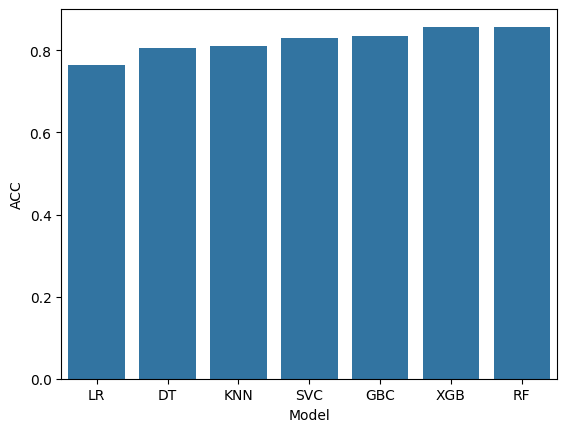

In [184]:

sns.barplot(data=performance_summary, x=performance_summary['Model'], y=performance_summary['ACC'])

As we can see, XGBoost Classifier has highest accuracy

In [185]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6),
            precision_score(y_test,y_pred6)
          ]
})

In [186]:
performance_summary = performance_summary.sort_values(by='PRECISION')

<Axes: xlabel='Model', ylabel='PRECISION'>

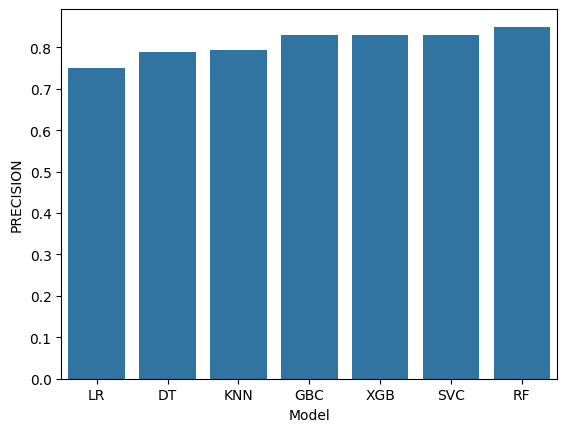

In [187]:
sns.barplot(data=performance_summary, x=performance_summary['Model'], y=performance_summary['PRECISION'])

## Saving the best model, XGBoost

In [188]:
X_train = sc.fit_transform(X_train)

In [189]:
model_xgb.fit(X_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [190]:
import joblib

In [191]:
joblib.dump(model_xgb, 'churn_predict_model')

['churn_predict_model']

In [192]:
model = joblib.load('churn_predict_model')

In [195]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')